## Packages



> Bloco com avanço



In [117]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load datasets

### Corpus/dictionary

Insert/edit file name and column name that will be transformed

Inserir/editar nome de ficheiro e nome de coluna a transformar

In [118]:
file_name = "Swadesh_Timor_FonologiaI_teste.csv"
column_name = "SourceWord"

Upload files from local machine

Carregar ficheiros a partir de máquina local

In [119]:
from google.colab import files
files.upload()

word_df = pd.read_csv(file_name, keep_default_na=False)
word_df = word_df[[column_name]]
word_df.columns = ["word"]


#### uncomment the following line to lower the string
# word_df["word"] = word_df["word"].str.lower()

word_df

Saving Swadesh_Timor_FonologiaI_teste.csv to Swadesh_Timor_FonologiaI_teste (6).csv


,word
0,teŋ
1,boŋ
2,ˈuŋwa
3,ˈuŋwa
4,alguˈdaŋ
...,...
125,ri
126,ˈkume
127,ˈkume
128,ˈsega


### Replacement table

Insert/edit file name and columns name that will with the transformation table and define regex use (True\False)

Inserir/editar nome de ficheiro e nomes de coluna com a tabela de transformação e definir utilização de regex (True\False)

In [120]:
file_name = "IPA_to_CV.csv"
source_column_name = "IPA"
target_column_name = "CV"
regex_value = False

Upload files from local machine

Carregar ficheiros a partir de máquina local

In [121]:
from google.colab import files
files.upload()

replace_rules = pd.read_csv(file_name, keep_default_na=False)

replace_rules

Saving IPA_to_CV.csv to IPA_to_CV (6).csv


,IPA,CV,Lenght
0,n̠̤d̠̤ʒ,C,7
1,ŋ̥ǂ͓ˡxˀ,C,7
2,n̪t̪s̪ʰ,C,7
3,n̪d̪z̪,C,6
4,t̪s̪ʷʰ,C,6
...,...,...,...
1961,ɞ,V,1
1962,g,C,1
1963,:,V,1
1964,ˈ,,0


Selecting transformation columns

Selecção de colunas de transformação

In [122]:
replace_rules = replace_rules[[source_column_name, target_column_name]]

replace_rules.columns = ["s_string","t_string"]
replace_rules


replace_rules

,s_string,t_string
0,n̠̤d̠̤ʒ,C
1,ŋ̥ǂ͓ˡxˀ,C
2,n̪t̪s̪ʰ,C
3,n̪d̪z̪,C
4,t̪s̪ʷʰ,C
...,...,...
1961,ɞ,V
1962,g,C
1963,:,V
1964,ˈ,


# Convertion script

In [123]:
word_df['new_word'] = word_df['word']

for row in replace_rules.itertuples():
    word_df['new_word'] = word_df['new_word'].str.replace(row.s_string, row.t_string, regex = regex_value)
    
word_df

,word,new_word
0,teŋ,CVC
1,boŋ,CVC
2,ˈuŋwa,ˈVCCV
3,ˈuŋwa,ˈVCCV
4,alguˈdaŋ,VCCVˈCVC
...,...,...
125,ri,CV
126,ˈkume,ˈCVCV
127,ˈkume,ˈCVCV
128,ˈsega,ˈCVCV


Remover diacrítico de acentuação e carateres não standard

Remove stress diacritic and non-standard characters

In [124]:
 word_df['new_word'] = word_df['new_word'].str.replace("\ˈ", "", regex=True)

word_df['new_word'] = word_df['new_word'].str.replace("\:", "V", regex=True)

word_df['new_word'] = word_df['new_word'].str.replace("\ε", "V", regex=True)	

 word_df

,word,new_word
0,teŋ,CVC
1,boŋ,CVC
2,ˈuŋwa,VCCV
3,ˈuŋwa,VCCV
4,alguˈdaŋ,VCCVCVC
...,...,...
125,ri,CV
126,ˈkume,CVCV
127,ˈkume,CVCV
128,ˈsega,CVCV


# Stats - Audit

## Counting string frequency

Contagem de frequência de cadeias de caracteres

In [125]:
word_list = list(word_df["new_word"])
word_list[0:5]

['CVC', 'CVC', 'VCCV', 'VCCV', 'VCCVCVC']

In [126]:
counts = Counter(word_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["string", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,string,count
0,CVCV,49
1,VCV,16
2,CV,9
3,CVCVCV,9
4,CCVCV,8
5,CVC,6
6,CVCCVCV,6
7,CVCCV,6
8,VCVCV,4
9,CVCVCVCV,4


### Visualization

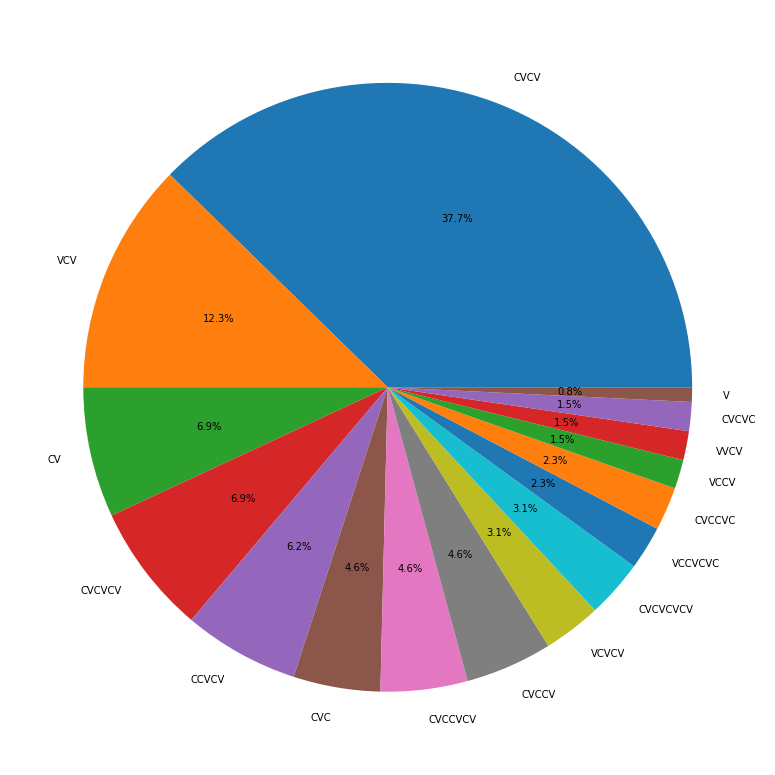

In [127]:
df1 = df.set_index('string')
plot = df1.plot.pie(y='count', ylabel='',autopct='%1.1f%%', legend=False, figsize=(14, 14))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


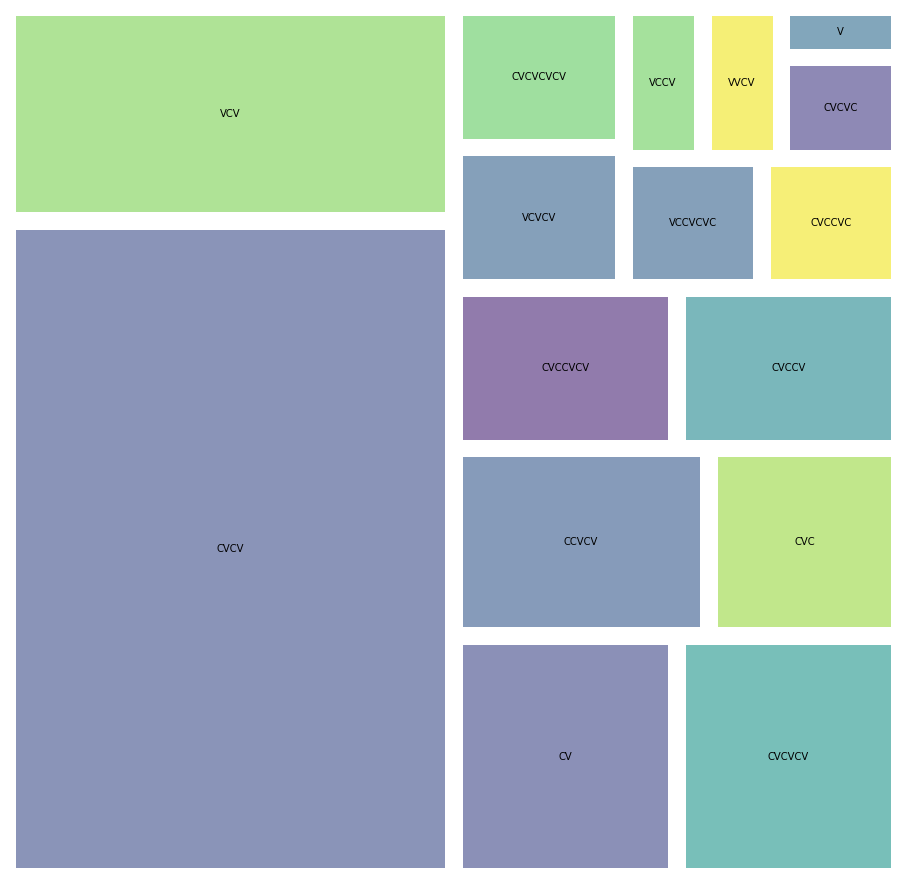

In [128]:
labels = list(df["string"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

## Counting character frequency

In [129]:
word_list = [" ".join(list(str(i))) for i in word_list]

### list first 6 elements
word_list[0:5]

['C V C', 'C V C', 'V C C V', 'V C C V', 'V C C V C V C']

In [130]:
word_list_split = [i.split(" ") for i in word_list]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
word_list_split[0:5] 

['C', 'V', 'C', 'C', 'V']

In [131]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["char", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,char,count
0,C,288
1,V,276


### Visualization

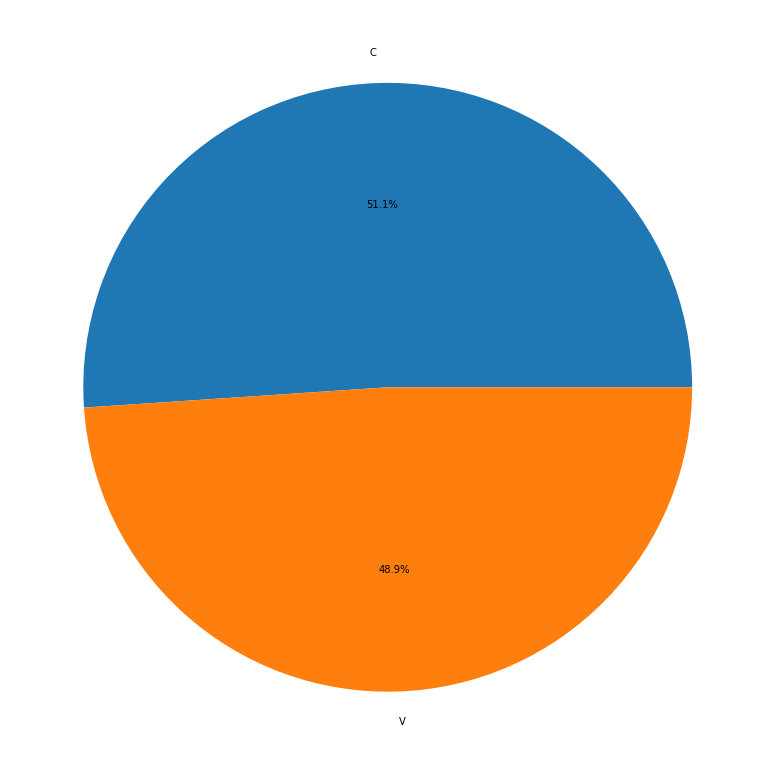

In [132]:
df1 = df.set_index('char')
plot = df1.plot.pie(y='count', ylabel='',autopct='%1.1f%%', legend=False, figsize=(14, 14))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


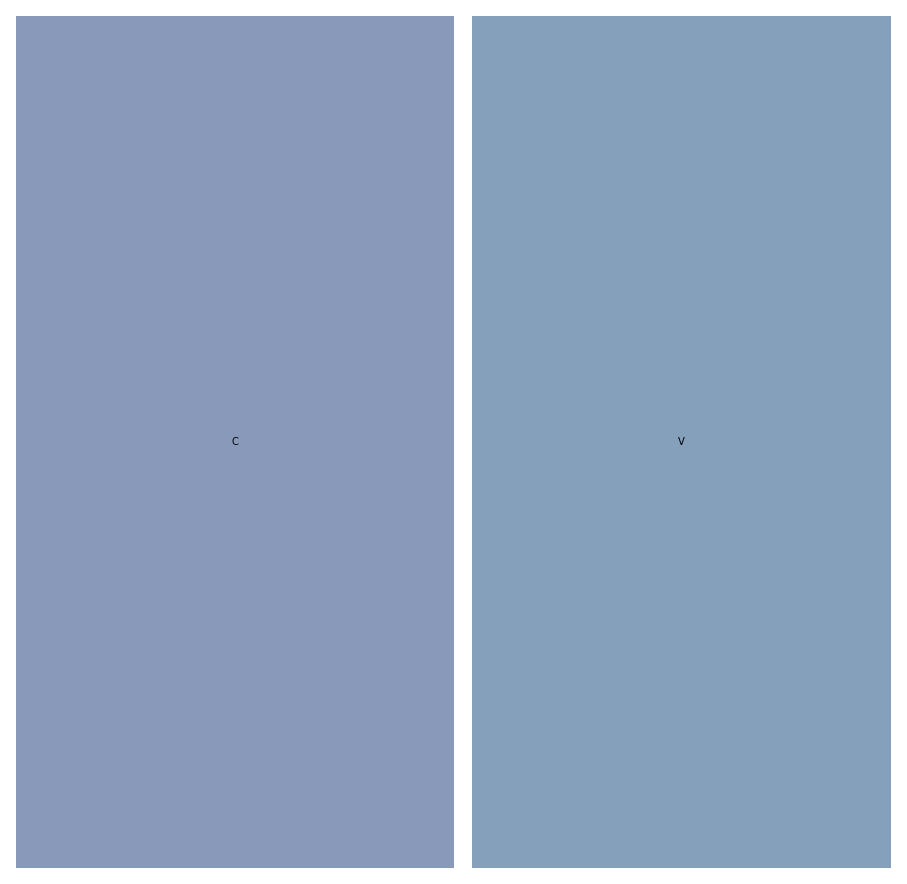

In [133]:
labels = list(df["char"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

# Output file

Insert/edit output file name

Inserir/editar nome de ficheiro de saída

In [134]:
file_name = "replacement_table.csv"

Download file

Descarregar ficheiro

In [135]:
word_df.to_csv(file_name, index = False, header = True)

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>